In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
dataset = load_boston()
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
df = pd.DataFrame(dataset.data, columns = dataset['feature_names'])
df_x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df_y = pd.DataFrame(dataset.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


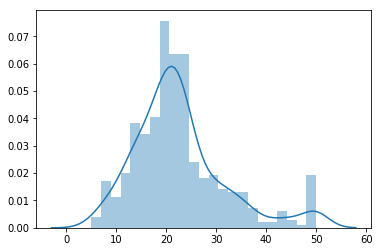

In [4]:
sns.distplot(df_y)

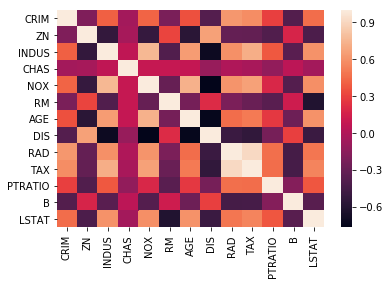

In [5]:
sns.heatmap(df.corr())

In [6]:
reg = linear_model.LinearRegression()

In [7]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.15,random_state=4)

In [8]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.coef_
coef_df = pd.DataFrame(reg.coef_.transpose(),df.columns,columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.127014
ZN,0.051912
INDUS,0.015019
CHAS,2.627089
NOX,-17.762291
RM,3.601789
AGE,-0.001908
DIS,-1.565909
RAD,0.333529
TAX,-0.013431


In [10]:
a = reg.predict(x_test)

In [11]:
# mean square error

np.mean((a-y_test)**2)

0    19.630735
dtype: float64